## Classification Model using Estimator API

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
## Using those features, we will try to predict class

In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
## Normalizing columns using pandas, this can also be done using scikit preprocessing

In [13]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [14]:
diabetes[cols_to_norm].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [25]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [26]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

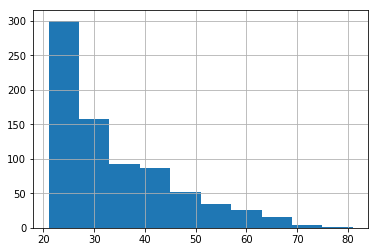

In [27]:
diabetes['Age'].hist(bins=10)

In [28]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70])

In [29]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [30]:
## Train Test Split

In [32]:
X_data = diabetes.drop('Class', axis=1)

In [33]:
X_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [34]:
labels = diabetes['Class']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.33, random_state=101)

In [38]:
input_func =tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_session_config': None, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\antamrak\\AppData\\Local\\Temp\\tmp4wuiv6xq', '_keep_checkpoint_max': 5}


In [44]:
trained = model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\antamrak\AppData\Local\Temp\tmp4wuiv6xq\model.ckpt-1001
INFO:tensorflow:Saving checkpoints for 1002 into C:\Users\antamrak\AppData\Local\Temp\tmp4wuiv6xq\model.ckpt.
INFO:tensorflow:loss = 5.06233, step = 1002
INFO:tensorflow:global_step/sec: 214.516
INFO:tensorflow:loss = 4.13305, step = 1102 (0.481 sec)
INFO:tensorflow:global_step/sec: 244.803
INFO:tensorflow:loss = 3.63059, step = 1202 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.308
INFO:tensorflow:loss = 4.11849, step = 1302 (0.398 sec)
INFO:tensorflow:global_step/sec: 267.24
INFO:tensorflow:loss = 7.60753, step = 1402 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.519
INFO:tensorflow:loss = 3.91911, step = 1502 (0.392 sec)
INFO:tensorflow:global_step/sec: 240.527
INFO:tensorflow:loss = 4.0639, step = 1602 (0.399 sec)
INFO:tensorflow:global_step/sec: 248.826
INFO:tensorflow:loss = 4.81177, step = 1702 (0.402 sec)
INFO:tensorflow:gl

In [42]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10,num_epochs=1,shuffle=False)

In [45]:
evaled = model.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-12-29-11:11:42
INFO:tensorflow:Restoring parameters from C:\Users\antamrak\AppData\Local\Temp\tmp4wuiv6xq\model.ckpt-2001
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

In [48]:
evaled

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.79688901,
 'auc_precision_recall': 0.63603175,
 'average_loss': 0.52041781,
 'global_step': 2001,
 'label/mean': 0.34251967,
 'loss': 5.0840816,
 'prediction/mean': 0.36037898}

In [49]:

pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [50]:
my_preds = list(model.predict(input_fn=pred_input_func))

INFO:tensorflow:Restoring parameters from C:\Users\antamrak\AppData\Local\Temp\tmp4wuiv6xq\model.ckpt-2001


In [55]:
##My Predictions

my_preds

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52921987], dtype=float32),
  'logits': array([ 0.11701286], dtype=float32),
  'probabilities': array([ 0.4707801 ,  0.52921987], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.66297936], dtype=float32),
  'logits': array([ 0.67659962], dtype=float32),
  'probabilities': array([ 0.33702067,  0.66297936], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34364301], dtype=float32),
  'logits': array([-0.6471014], dtype=float32),
  'probabilities': array([ 0.65635693,  0.34364301], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31824547], dtype=float32),
  'logits': array([-0.76184666], dtype=float32),
  'probabilities': array([ 0.68175453,  0.31824547], dtype=floa

## Dense Neural Network Classifier

In [58]:
## Categorial column should be embedded in DNN model . We can't use them directly

In [59]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [60]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_bucket]

In [61]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [66]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_session_config': None, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\antamrak\\AppData\\Local\\Temp\\tmpg07al2l1', '_keep_checkpoint_max': 5}


In [67]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\antamrak\AppData\Local\Temp\tmpg07al2l1\model.ckpt.
INFO:tensorflow:loss = 6.96701, step = 1
INFO:tensorflow:global_step/sec: 188.864
INFO:tensorflow:loss = 6.11126, step = 101 (0.532 sec)
INFO:tensorflow:global_step/sec: 217.35
INFO:tensorflow:loss = 7.69072, step = 201 (0.459 sec)
INFO:tensorflow:global_step/sec: 235.787
INFO:tensorflow:loss = 7.62714, step = 301 (0.428 sec)
INFO:tensorflow:global_step/sec: 242.957
INFO:tensorflow:loss = 4.79112, step = 401 (0.412 sec)
INFO:tensorflow:global_step/sec: 207.391
INFO:tensorflow:loss = 8.36479, step = 501 (0.480 sec)
INFO:tensorflow:global_step/sec: 190.934
INFO:tensorflow:loss = 5.16251, step = 601 (0.522 sec)
INFO:tensorflow:global_step/sec: 224.147
INFO:tensorflow:loss = 5.37035, step = 701 (0.447 sec)
INFO:tensorflow:global_step/sec: 228.769
INFO:tensorflow:loss = 2.80969, step = 801 (0.439 sec)
INFO:tensorflow:global_step/sec: 189.37
I

In [72]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [73]:
evaled_dnn = model.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-12-29-11:31:34
INFO:tensorflow:Restoring parameters from C:\Users\antamrak\AppData\Local\Temp\tmp4wuiv6xq\model.ckpt-2001
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

In [ ]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_train[])